# MIDAS-Open tabulated data



## Exploring data with pandas 

### Overview 

* This notebook contains examples of exploring climate data with pandas
* site specific data 
    * rainfall 
    
### Prerequisites 

* __Please see 03_aircraft_data.pynb for instructions on ceda certificates. The valid CEDA certificate must be linked to in the specfied environment file below__

To successfully navigate this notebook, you should be familiar with:

* Basics of python programming 
    * loading modules 
    * variable assignment 
    * basic plotting packages (Matplotlib)
* Basic understanding of weather and climate, for example:
    * Latitude is North-South
    * Longitude is East-West
    
### Learning outcomes 

After this notebook you should have the skills to: 

* Explore data with pandas 
* Visualise the data you're dealing with 
* Calculate statistics with pandas

    
### Background 

Pandas works with tabular data. Tabular data is a type of data base such as data stored in a spreadsheet or CSV (comma-separated values) file. Pandas works with this data as a DataFrame, which makes exploring and working with your data easy and intuitive. [Pandas Overview](https://pandas.pydata.org/docs/getting_started/overview.html#:~:text=pandas%20is%20a%20Python%20package,world%20data%20analysis%20in%20Python.)

#### First of all we need to load our data with pandas

* We need to import pandas 
    * also import numpy and matplotlib (standard modules)
    
* can use pandas.read_csv('file') to load a csv file 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# notebook settings
env_file_path = ".env"

HIDE_SECRET_OUTPUT = True

path_to_save_data = './data/MIDAS'

For this notebook, a .env file is defined in order to abstract away keys personal to the user. The .env file is kept in the same directory as this notebook. Here is an example of what the .env file looks like:

```
ATMOSPHERIC_CLIENT_ID=xxxxxxxxxxxxxxxxxxxxxx
ATMOSPHERIC_CLIENT_SECRET=xxxxxxxxxxxxxxxxxxxxxx
SOME_OTHER_ENV_VAR=2gt2t1t2t7224pZ/*321
```

As shown, the format for each variable is ENV_VAR_NAME=ENV_SECRET with no spaces between the '=' and the definitions, or at the beginning of a line. A newline is required between each environment variable.
<br>Due to how the file is read without a the common tool `dotenv`, the .env file expects no comments, nor an in-file informational header. The names of each variable should be obvious.
<br>
<br>A __template file for .env__ is given in the repository called `.env_template`. after filling in the template with the users own information, either rename the file itself, or the path to the file in the setting variable above (env_file_path)

In [ ]:
# read environment file
env_vars = {}

with open(env_file_path) as f:
    for line in f:
        key, value = line.strip().split("=", 1)
        env_vars[key] = value

print(env_vars)
if HIDE_SECRET_OUTPUT:
    clear_output()

In [ ]:
# load environment variables
CERT_SECRET = env_vars["CEDA_CERTIFICATE_DIRECTORY"]

In [32]:
links_to_data = [
    'https://dap.ceda.ac.uk/badc/ukmo-midas-open/data/uk-daily-rain-obs/dataset-version-202107/devon/01377_exmouth/qc-version-1/midas-open_uk-daily-rain-obs_dv-202107_devon_01377_exmouth_qcv-1_1991.csv'
]
paths_to_data = []

for link in links_to_data:
    nc_file_name = link.split("/")[-1]
    file_save_path = path_to_save_data + '/' + nc_file_name
    
    paths_to_data.append(file_save_path)
    if not os.path.exists(
        file_save_path
    ):  # don't download files if already exist on disk
        response = requests.get(link, cert=(CERT_SECRET))
        response_content = response.content
        if response.status_code != 200:
            print(response_content)
            print(
                "\n!!!Exception, likely the certificate is not valid! response above!!!\n"
            )
            raise Exception()
        with open(file_save_path, "wb") as f:
            f.write(response_content)

# print(paths_to_data)

In [33]:
filename = f'{path_to_save_data}/midas-open_uk-daily-rain-obs_dv-202107_devon_01377_exmouth_qcv-1_1991.csv'

* Below iv created a function to load in the data
* This is required as the data length per row differs due to having metadata at the start 
* The function will produce 
    * A dataframe for the data
    * A metadata dataframe containing all the metadata
    * a list of all the metadata that goes into the metadata dataframe 
    

In [34]:
def open_csv_from_ceda(filename):
    with open(filename) as file:
        lines = file.readlines() # splits files into lines of strings
        lines_length = [] # sets empty list to append the length of lines to 
        [lines_length.append(len(line.split(','))) for line in lines] #uses list comprehension to 
        # split the line which is 1 big sting into a list of smaller string using the seperator ','
        # finds the length of this new list which is how many columbs we need and appends to lines length
        split_index = lines_length.index(max(lines_length)) # finds index where the first max value occurs
        meta_data_list = lines[:split_index] # takes everything before the max as meta data
        data = lines[split_index:] # everything after as data
        metadata_df = pd.DataFrame([line.split(',') for line in meta_data_list]) # again seperates each line by ',' using 
        # list comprehension so can be added to dataframe 
        df = pd.DataFrame([line.split(',') for line in data])
        #we want the first row to be the headers of the columns 
        # we can use `df.iloc[0]` to index the first row and store as headers
        # then we can make a new dataframe from index 1 onwards and label the columns as headers
        headers = df.iloc[0]
        df  = pd.DataFrame(df.values[1:-1], columns=headers)
    return df, metadata_df,meta_data_list

In [35]:
df, md_df, md_list = open_csv_from_ceda(filename)

We can now have a look at our data 
* `df.head()` shows the first 5 rows of the dataframe 
* `df.tail()` shows the last 5 rows of the dataframe 
* adding a number to the bracket shows more eg 10 should show 10 rows 

In [36]:
df.head()

,ob_date,id,id_type,version_num,met_domain_name,ob_end_ctime,ob_day_cnt,src_id,rec_st_ind,prcp_amt,ob_day_cnt_q,prcp_amt_q,prcp_amt_j,meto_stmp_time,midas_stmp_etime\n
0,1991-01-01 00:00:00,354863,RAIN,1,DLY3208,900,1,1377,1001,1,0,9,NA,NA,NA\n
1,1991-01-02 00:00:00,354863,RAIN,1,DLY3208,900,1,1377,1001,15.7,0,9,NA,NA,NA\n
2,1991-01-03 00:00:00,354863,RAIN,1,DLY3208,900,1,1377,1001,2.7,0,9,NA,NA,NA\n
3,1991-01-04 00:00:00,354863,RAIN,1,DLY3208,900,1,1377,1001,6.4,0,9,NA,NA,NA\n
4,1991-01-05 00:00:00,354863,RAIN,1,DLY3208,900,1,1377,1001,7.1,0,9,NA,NA,NA\n


In [37]:
df.tail(10)

,ob_date,id,id_type,version_num,met_domain_name,ob_end_ctime,ob_day_cnt,src_id,rec_st_ind,prcp_amt,ob_day_cnt_q,prcp_amt_q,prcp_amt_j,meto_stmp_time,midas_stmp_etime\n
355,1991-12-22 00:00:00,354863,RAIN,1,DLY3208,900,1,1377,1001,0.7,0,9,NA,NA,NA\n
356,1991-12-23 00:00:00,354863,RAIN,1,DLY3208,900,1,1377,1001,0,0,10009,NA,NA,NA\n
357,1991-12-24 00:00:00,354863,RAIN,1,DLY3208,900,1,1377,1001,0.7,0,9,NA,NA,NA\n
358,1991-12-25 00:00:00,354863,RAIN,1,DLY3208,900,1,1377,1001,0,0,9,NA,NA,NA\n
359,1991-12-26 00:00:00,354863,RAIN,1,DLY3208,900,1,1377,1001,0,0,9,NA,NA,NA\n
360,1991-12-27 00:00:00,354863,RAIN,1,DLY3208,900,1,1377,1001,0,0,10009,NA,NA,NA\n
361,1991-12-28 00:00:00,354863,RAIN,1,DLY3208,900,1,1377,1001,0,0,9,NA,NA,NA\n
362,1991-12-29 00:00:00,354863,RAIN,1,DLY3208,900,1,1377,1001,0,0,9,NA,NA,NA\n
363,1991-12-30 00:00:00,354863,RAIN,1,DLY3208,900,1,1377,1001,0,0,9,NA,NA,NA\n
364,1991-12-31 00:00:00,354863,RAIN,1,DLY3208,900,1,1377,1001,0,0,9,NA,NA,NA\n


In [38]:
md_df.head()

,0,1,2,3
0,Conventions,G,BADC-CSV,1\n
1,title,G,uk-daily-rain-obs\n,None
2,source,G,Met Office MIDAS database\n,None
3,creator,G,Met Office\n,None
4,activity,G,Met Office MIDAS Open: UK Land Surface Station...,None


* `.columns` will print the column headers 

In [39]:
df.columns

Index(['ob_date', 'id', 'id_type', 'version_num', 'met_domain_name',
       'ob_end_ctime', 'ob_day_cnt', 'src_id', 'rec_st_ind', 'prcp_amt',
       'ob_day_cnt_q', 'prcp_amt_q', 'prcp_amt_j', 'meto_stmp_time',
       'midas_stmp_etime\n'],
      dtype='object', name=0)

* looks like we have a few things 
    * time the measurement was taken 
    * some kind of ID
    * a domain name
    * we have precipitation amount 
    * not sure the difference between prcp_amt, prcp_amt_j, prcp_amt_q
        * q and j look empty
   
* we can extract certain columns into a new dataframe 
    * for example `df['id_type']` would be a dataframe of just the ID types

In [40]:
df.shape #tells us the size of our data frame 

(365, 15)

`.info()` returns some summary information about our dataframe 

* The range of our index
* The number of columns 
* Datatype in each column
* Non-null count gives the number of entries that are not null 
* Memory usage 

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ob_date            365 non-null    object
 1   id                 365 non-null    object
 2   id_type            365 non-null    object
 3   version_num        365 non-null    object
 4   met_domain_name    365 non-null    object
 5   ob_end_ctime       365 non-null    object
 6   ob_day_cnt         365 non-null    object
 7   src_id             365 non-null    object
 8   rec_st_ind         365 non-null    object
 9   prcp_amt           365 non-null    object
 10  ob_day_cnt_q       365 non-null    object
 11  prcp_amt_q         365 non-null    object
 12  prcp_amt_j         365 non-null    object
 13  meto_stmp_time     365 non-null    object
 14  midas_stmp_etime
  365 non-null    object
dtypes: object(15)
memory usage: 42.9+ KB


* `.describe()` gives an overview of some statistics  

In [42]:
df.describe()

,ob_date,id,id_type,version_num,met_domain_name,ob_end_ctime,ob_day_cnt,src_id,rec_st_ind,prcp_amt,ob_day_cnt_q,prcp_amt_q,prcp_amt_j,meto_stmp_time,midas_stmp_etime\n
count,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365
unique,365,1,1,1,1,1,1,1,1,76,1,2,2,1,1
top,1991-01-01 00:00:00,354863,RAIN,1,DLY3208,900,1,1377,1001,0,0,9,NA,NA,NA\n
freq,1,365,365,365,365,365,365,365,365,201,365,311,360,365,365


In [43]:
df.dtypes

0
ob_date               object
id                    object
id_type               object
version_num           object
met_domain_name       object
ob_end_ctime          object
ob_day_cnt            object
src_id                object
rec_st_ind            object
prcp_amt              object
ob_day_cnt_q          object
prcp_amt_q            object
prcp_amt_j            object
meto_stmp_time        object
midas_stmp_etime\n    object
dtype: object

From the output above it looks like the only columns that have any data are ob_date and prcp_amt. This is fine as we are most interested in the precip amount and the date the measurement was taken

* We can create a separate dataframe just from the columns we are interested in 
    * here we will use 'ob_date' and 'prcp_amt'

When accessing a column of a dataframe you can think of it the same way as using a key in a dictionary, we use square brackets and pass the name of the column as a string. So to access multiple columns we pass a list of strings that correspond to headers



In [44]:
df_precip = df[['ob_date','prcp_amt']]

In [45]:
df_precip.head()

,ob_date,prcp_amt
0,1991-01-01 00:00:00,1
1,1991-01-02 00:00:00,15.7
2,1991-01-03 00:00:00,2.7
3,1991-01-04 00:00:00,6.4
4,1991-01-05 00:00:00,7.1


In [46]:
df_precip.dtypes

0
ob_date     object
prcp_amt    object
dtype: object

* Now we can see df_precip is a smaller datafraame with the dates of observation and precip amount 
* using .dtypes we can see our datatypes are objects
* this isn't very useful for dates and numbers 
* we can change this to be more useful for the types of operation we might want to do

In [47]:
df_precip.loc[:,'prcp_amt'] = df_precip['prcp_amt'].astype('float')
# I am usin .loc

/var/tmp/ipykernel_70272/1586291051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_precip.loc[:,'prcp_amt'] = df_precip['prcp_amt'].astype('float')
/var/tmp/ipykernel_70272/1586291051.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_precip.loc[:,'prcp_amt'] = df_precip['prcp_amt'].astype('float')


* All we have done above is say we want the 'prcp_amt' column to be type 'float' 
* Then we assign this back to our column so we change our data type 
* we can see this has worked below 

In [48]:
df_precip.dtypes

0
ob_date      object
prcp_amt    float64
dtype: object

* How our precipitation values are numeric, we can plot them!
* selecting our column and using .plot plots the series is plotted with the index on the x-axis

<AxesSubplot: >

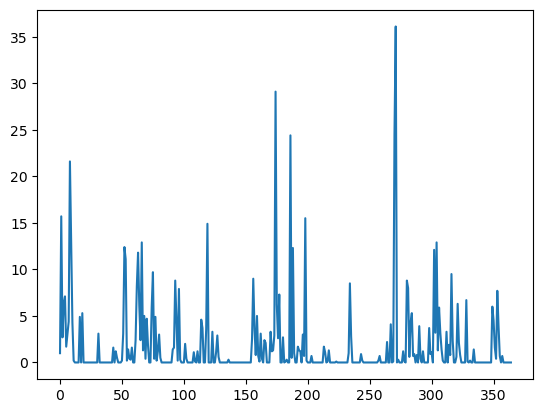

In [49]:
df_precip['prcp_amt'].plot()

#### something to point out while we are selecting columns 

* Each column in a dataframe is called a series 
* Series are useful things in pandas and have their own section of the docs 
[series documentation](https://pandas.pydata.org/pandas-docs/stable/reference/series.html)
* when we are extracting a column and performing a operation like above, this is a series operation
    * this isn't to say dataframe don't have the same operations however their outputs can differ

#### The next thing we will deal with is our index

* having our index as numerical values probably isn't that useful 
* it would be far more useful having the day of observation as the index
* First we need our dates to be datetime's rather than objects 
* We can fix this similar to our numeric values, this time just using pandas to_datetime function

In [50]:
df_precip.loc[:,'ob_date'] = pd.to_datetime(df_precip["ob_date"])


/var/tmp/ipykernel_70272/988181090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_precip.loc[:,'ob_date'] = pd.to_datetime(df_precip["ob_date"])
/var/tmp/ipykernel_70272/988181090.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_precip.loc[:,'ob_date'] = pd.to_datetime(df_precip["ob_date"])


In [51]:
df_precip.dtypes

0
ob_date     datetime64[ns]
prcp_amt           float64
dtype: object

now we can see both our series are the correct data types 

* now lets make these dates our index
* for this we just use .set_index and specify the series we would like as our index

In [52]:
df_precip = df_precip.set_index('ob_date')

In [53]:
df_precip.head()

,prcp_amt
ob_date,
1991-01-01,1.0
1991-01-02,15.7
1991-01-03,2.7
1991-01-04,6.4
1991-01-05,7.1


* This looks much better now 
* Lets revisit `df.describe()`

In [54]:
df_precip.describe()

,prcp_amt
count,365.000000
mean,1.793151
std,4.188620
min,0.000000
25%,0.000000
50%,0.000000
75%,1.400000
max,36.100000


* Since each column now has a numeric data type, the `.describe()` function returns a summary of its statistics 
* Now lets look at the total rainfall over the whole year
* we can do a cumulative sum through the year 

In [55]:
df_precip['prcp_amt_cumsum'] = df_precip.cumsum()['prcp_amt']

* here we have specified a new series, named `prcp_amt_cumsum`
* the `.cumsum()` function runs the operation on each column in the dataframe
* since we are interested in the cumulative sum of the `prcp_amt` column, we specify that column from the new dataframe
* this is now assigned to our new column `prcp_amt_cumsum`

In [56]:
df_precip.head()

,prcp_amt,prcp_amt_cumsum
ob_date,,
1991-01-01,1.0,1.0
1991-01-02,15.7,16.7
1991-01-03,2.7,19.4
1991-01-04,6.4,25.8
1991-01-05,7.1,32.9


#### Now lets plot some time series again 
* using subplots we can plot both series in one figure

(array([7670, 7701, 7729, 7760, 7790, 7821, 7851, 7882, 7913, 7943, 7974,
        8004, 8034]),
 [Text(7670, 0, 'Jan\n1991'),
  Text(7701, 0, 'Feb'),
  Text(7729, 0, 'Mar'),
  Text(7760, 0, 'Apr'),
  Text(7790, 0, 'May'),
  Text(7821, 0, 'Jun'),
  Text(7851, 0, 'Jul'),
  Text(7882, 0, 'Aug'),
  Text(7913, 0, 'Sep'),
  Text(7943, 0, 'Oct'),
  Text(7974, 0, 'Nov'),
  Text(8004, 0, 'Dec'),
  Text(8034, 0, '')])

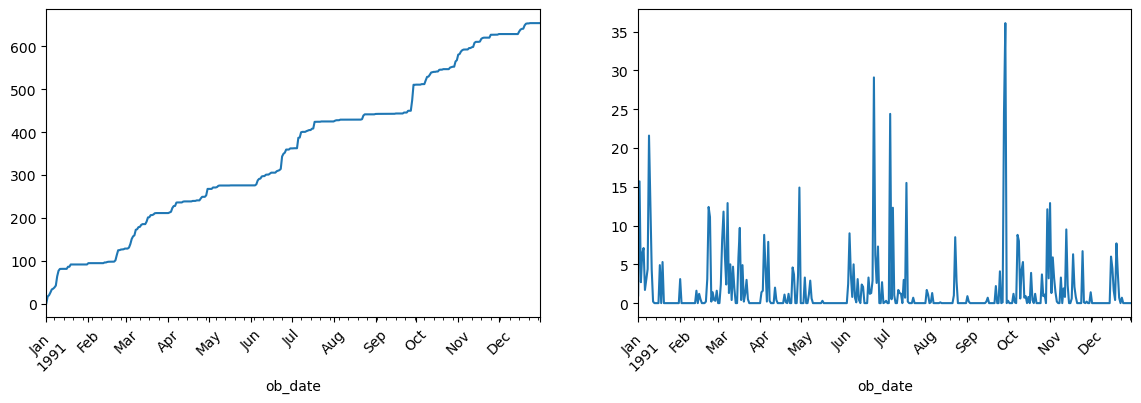

In [57]:
fig = plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
df_precip['prcp_amt_cumsum'].plot()
plt.xticks(rotation=45)
plt.subplot(1,2,2)
df_precip['prcp_amt'].plot()
plt.xticks(rotation=45) 

* now by having our date as the index, it plots for us automatically

Lets have a look at finding some days we might be interested in, for example max rainfall:

* Using `.max()` will show us the max value in each series 
* Using `.idxmax()` will show us the index as which the highest value takes place

In [58]:
df_precip.max()

0
prcp_amt            36.1
prcp_amt_cumsum    654.5
dtype: float64

In [59]:
df_precip.idxmax() 

0
prcp_amt          1991-09-29
prcp_amt_cumsum   1991-12-24
dtype: datetime64[ns]

* So the day with maximum rainfall is 1991-09-29 with 36.1 mm of rain

* So what if were interested about rainfall on a particular day? 
* Well we can index that day by providing the date
    * We can input the date as a string 
    * Or we can use a datetime object
* We can index a row by using .loc
* Lets look at the May the Forth for example

Start with indexing the date using a string

In [60]:
df_precip.loc['1991-05-04']

0
prcp_amt             3.3
prcp_amt_cumsum    270.9
Name: 1991-05-04 00:00:00, dtype: float64

Now lets use a datetime object, first import datetime 

In [61]:
import datetime 

Incase you're not familiar with datetime, `datetime.datetime(year,month,day)` returns a datetime object of that day

In [62]:
datetime.datetime(1991,5,4)

datetime.datetime(1991, 5, 4, 0, 0)

In [63]:
df_precip.loc[datetime.datetime(1991,5,4)]

0
prcp_amt             3.3
prcp_amt_cumsum    270.9
Name: 1991-05-04 00:00:00, dtype: float64

#### Grouping data 

* Now lets group some data
* Lets look at monthly totals of rainfall
* To do this pandas has a function called [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)
* Using `groupby` you can pass an argument which to group the data
* in this case we will use [pd.Grouper()](https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html) and select frequency of month 
* Then we need to decide what to do with these groups, in our case we will sum the values 
    * equally we could've used something else, mean for example

In [64]:
df_precip.groupby(pd.Grouper(freq = 'M')).sum()

,prcp_amt,prcp_amt_cumsum
ob_date,,
1991-01-31,91.2,2193.3
1991-02-28,37.1,2879.3
1991-03-31,82.9,5761.0
1991-04-30,56.4,7118.6
1991-05-31,8.2,8503.4
1991-06-30,86.3,9300.5
1991-07-31,62.9,12566.6
1991-08-31,16.6,13405.3
1991-09-30,69.0,13485.0


* Lets assign this to a new DataFrame

In [65]:
df_monthly = df_precip.groupby(pd.Grouper(freq = 'M')).sum()

* Were not really interested in the sum of the cumulative sum 
* Pandas allows us to easily drop columns by using drop

In [66]:
df_monthly = df_monthly.drop(labels=['prcp_amt_cumsum'],axis='columns')

* Lets find the month with the max rainfall

In [67]:
df_monthly.max()

0
prcp_amt    91.2
dtype: float64

In [68]:
df_monthly.idxmax()

0
prcp_amt   1991-01-31
dtype: datetime64[ns]

* Lets visualise each months rainfall with a bar graph
* Instead of just using plot we specify the type of plot

<AxesSubplot: xlabel='ob_date'>

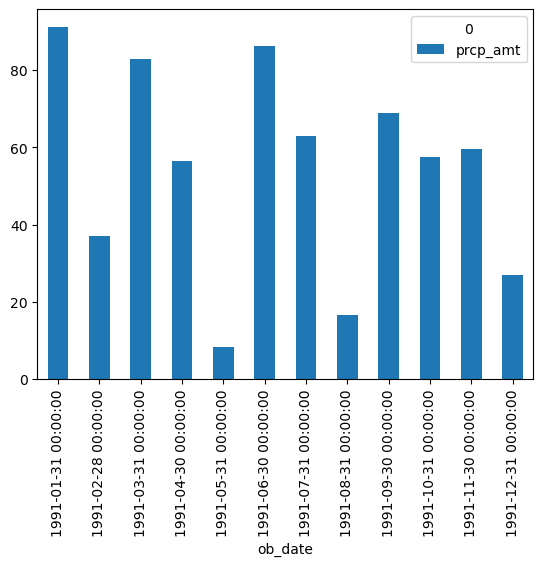

In [69]:
df_monthly.plot.bar()

<AxesSubplot: >

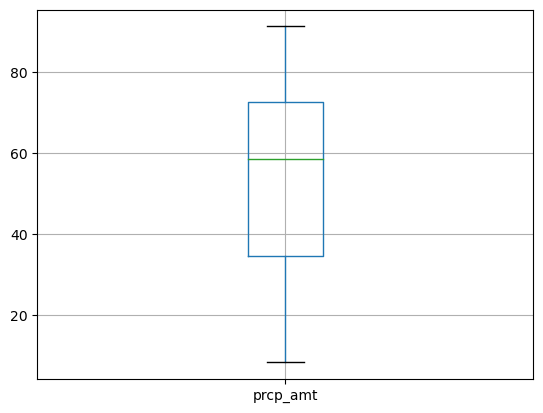

In [70]:
df_monthly.boxplot()

<AxesSubplot: >

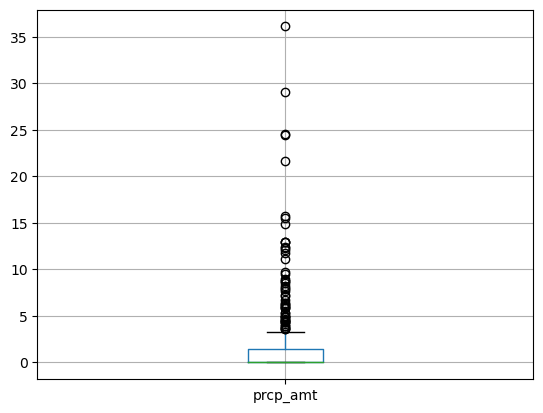

In [71]:
df_precip.boxplot(column = 'prcp_amt')
#plt.yscale('log')

#### Metadata 

* Metadata from these files haven't come in a convenient way - but thats okay!
* Below is a function that searches for a key word in each row of a Dataframe and returns that row
* `md_df.astype(str)` turns the entire dataframe into type string 
* `.sum(axis=1)` adds the strings in each row together
* `.str.contains(keyword)` searches each of these strings for the keyword you provide
* Another feature of .loc is you can index based on a boolean array
* so we set our argument `md_df.astype(str).sum(axis=1).str.contains(keyword)` equal to True 
    * Basically saying return all the rows where this keyword is present in the string

In [72]:
def search_metadata(md_df, keyword):
    ''' md_df is your metadata dataframe and keyword is the word you are searching for, keyword is a str'''
    return md_df.loc[md_df.astype(str).sum(axis=1).str.contains(keyword) == True]

* So if we are interested in the units of prcp_amt, it would be reasonable to assume searching for prcp_amt would return relevant rows with metadata focused on prcp_amt

In [73]:
search_metadata(md_df,'prcp_amt')

,0,1,2,3
47,long_name,prcp_amt,Precipitation amount,mm\n
48,type,prcp_amt,float\n,None
51,long_name,prcp_amt_q,QC code: precipitation amount,1\n
52,type,prcp_amt_q,int\n,None
53,long_name,prcp_amt_j,Descriptor: precipitation amount,1\n
54,type,prcp_amt_j,int\n,None


* In the top row we can see our units for Precipitation amount is mm 

### Lets have a look at another file 

In [74]:
filename1 = '/data/users/ncreaser/CEDA/midas-open_uk-daily-weather-obs_dv-202107_humberside_00369_hull_qcv-1_1904.csv'

In [75]:
df1, df_md1 , md_list = open_csv_from_ceda(filename1)

In [76]:
df1.shape

(366, 34)

In [77]:
df1.head()

,ob_end_time,id,id_type,ob_hour_count,version_num,met_domain_name,src_id,rec_st_ind,cs_24hr_sun_dur,wmo_24hr_sun_dur,...,snow_day_id_q,hail_day_id_q,thunder_day_flag_q,gale_day_flag_q,meto_stmp_time,midas_stmp_etime,drv_24hr_sun_dur,drv_24hr_sun_dur_q,lying_snow_ht,lying_snow_ht_q\n
0,1904-01-01 23:59:00,2361,DCNN,24,1,DLY3208,369,1001,0,NA,...,NA,NA,NA,NA,2007-10-09 12:13:15,NA,NA,NA,NA,NA\n
1,1904-01-02 23:59:00,2361,DCNN,24,1,DLY3208,369,1001,0,NA,...,NA,NA,NA,NA,2007-10-09 12:13:15,NA,NA,NA,NA,NA\n
2,1904-01-03 23:59:00,2361,DCNN,24,1,DLY3208,369,1001,0,NA,...,NA,NA,NA,NA,2007-10-09 12:13:15,NA,NA,NA,NA,NA\n
3,1904-01-04 23:59:00,2361,DCNN,24,1,DLY3208,369,1001,0,NA,...,NA,NA,NA,NA,2007-10-09 12:13:15,NA,NA,NA,NA,NA\n
4,1904-01-05 23:59:00,2361,DCNN,24,1,DLY3208,369,1001,0,NA,...,NA,NA,NA,NA,2007-10-09 12:13:15,NA,NA,NA,NA,NA\n


In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ob_end_time            366 non-null    object
 1   id                     366 non-null    object
 2   id_type                366 non-null    object
 3   ob_hour_count          366 non-null    object
 4   version_num            366 non-null    object
 5   met_domain_name        366 non-null    object
 6   src_id                 366 non-null    object
 7   rec_st_ind             366 non-null    object
 8   cs_24hr_sun_dur        366 non-null    object
 9   wmo_24hr_sun_dur       366 non-null    object
 10  conc_state_id          366 non-null    object
 11  lying_snow_flag        366 non-null    object
 12  snow_depth             366 non-null    object
 13  frsh_snw_amt           366 non-null    object
 14  snow_day_id            366 non-null    object
 15  hail_day_id            

In [79]:
df1.describe()

,ob_end_time,id,id_type,ob_hour_count,version_num,met_domain_name,src_id,rec_st_ind,cs_24hr_sun_dur,wmo_24hr_sun_dur,...,snow_day_id_q,hail_day_id_q,thunder_day_flag_q,gale_day_flag_q,meto_stmp_time,midas_stmp_etime,drv_24hr_sun_dur,drv_24hr_sun_dur_q,lying_snow_ht,lying_snow_ht_q\n
count,366,366,366,366,366,366,366,366,366,366,...,366,366,366,366,366,366,366,366,366,366
unique,366,1,1,1,1,1,1,1,64,1,...,1,1,1,1,6,1,1,1,1,1
top,1904-01-01 23:59:00,2361,DCNN,24,1,DLY3208,369,1001,0,NA,...,NA,NA,NA,NA,2007-10-09 12:13:15,NA,NA,NA,NA,NA\n
freq,1,366,366,366,366,366,366,366,142,366,...,366,366,366,366,162,366,366,366,366,366


* Looks like the only columns with more than 1 value are `ob_end_time` , `cs_24hr_sun_dur` and `meto_stmp_time`

In [80]:
df_sundur = df1[['ob_end_time','cs_24hr_sun_dur','meto_stmp_time']]

In [81]:
df_sundur.dtypes

0
ob_end_time        object
cs_24hr_sun_dur    object
meto_stmp_time     object
dtype: object

In [82]:
df_sundur.head()

,ob_end_time,cs_24hr_sun_dur,meto_stmp_time
0,1904-01-01 23:59:00,0,2007-10-09 12:13:15
1,1904-01-02 23:59:00,0,2007-10-09 12:13:15
2,1904-01-03 23:59:00,0,2007-10-09 12:13:15
3,1904-01-04 23:59:00,0,2007-10-09 12:13:15
4,1904-01-05 23:59:00,0,2007-10-09 12:13:15


* We have two columns with dates, we should turn these into datetime's
* `cs_24hr_sun_dur` should be a float

In [83]:
df_sundur.loc[:,'ob_end_time'] = pd.to_datetime(df_sundur['ob_end_time'])
df_sundur.loc[:,'meto_stmp_time'] = pd.to_datetime(df_sundur['meto_stmp_time'])
df_sundur.loc[:,'cs_24hr_sun_dur'] = df_sundur['cs_24hr_sun_dur'].astype('float')


/var/tmp/ipykernel_70272/1085516654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sundur.loc[:,'ob_end_time'] = pd.to_datetime(df_sundur['ob_end_time'])
/var/tmp/ipykernel_70272/1085516654.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_sundur.loc[:,'ob_end_time'] = pd.to_datetime(df_sundur['ob_end_time'])
/var/tmp/ipykernel_70272/1085516654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [84]:
df_sundur.dtypes

0
ob_end_time        datetime64[ns]
cs_24hr_sun_dur           float64
meto_stmp_time     datetime64[ns]
dtype: object

In [85]:
df_sundur = df_sundur.set_index('ob_end_time')

In [86]:
df_sundur.head()

,cs_24hr_sun_dur,meto_stmp_time
ob_end_time,,
1904-01-01 23:59:00,0.0,2007-10-09 12:13:15
1904-01-02 23:59:00,0.0,2007-10-09 12:13:15
1904-01-03 23:59:00,0.0,2007-10-09 12:13:15
1904-01-04 23:59:00,0.0,2007-10-09 12:13:15
1904-01-05 23:59:00,0.0,2007-10-09 12:13:15


In [87]:
df_sundur.describe()

,cs_24hr_sun_dur
count,366.000000
mean,2.301913
std,2.976349
min,0.000000
25%,0.000000
50%,1.000000
75%,4.200000
max,12.400000


In [88]:
df_sundur.nunique()

0
cs_24hr_sun_dur    64
meto_stmp_time      6
dtype: int64

* Lets plot our hours of sun duration
* We will also plot a [rolling mean](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) with a window of 30 days to get a more general picture


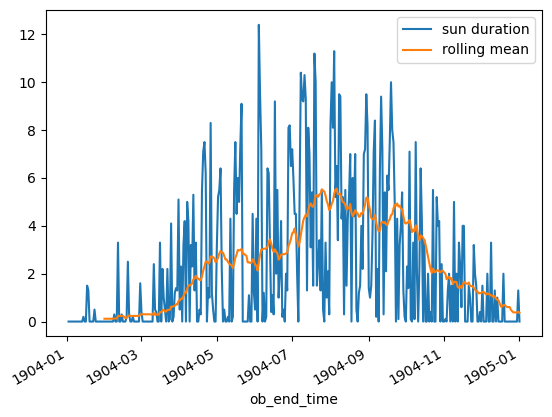

In [89]:
df_sundur['cs_24hr_sun_dur'].plot(label='sun duration')
df_sundur['cs_24hr_sun_dur'].rolling(30).mean().plot(label='rolling mean')
plt.legend()

In [90]:
search_metadata(df_md1,'cs_24hr_sun_dur')

,0,1,2,3
45,long_name,cs_24hr_sun_dur,Campbell-stokes hour sunshine duration,hours\n
46,type,cs_24hr_sun_dur,float\n,None
68,long_name,cs_24hr_sun_dur_q,QC code: Campbell-stokes hour sunshine duration,1\n
69,type,cs_24hr_sun_dur_q,int\n,None


## Exercises that extend the notebook
Below are a list of items that could be implemented or changed to the notebook for extended functionality (or issues with the notebook that are "Left As An Exercise To The Reader", sorry!). The list of these items are ordered in my own personal preference for notebook enhancements

- Try different rolling means on the final plot and compare to the differences
- Re-write the pandas expressions to avoid the warnings

## Data Statement

__Data used in this tutorial uses Met Office MIDAS-Open data__

__Contains public sector information licensed under the Open Government Licence__

- Link to Open Government Licence V3: https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/
- Sources of Data: https://data.ceda.ac.uk/badc/ukmo-midas-open/data/

______________________________________________________________________

## References

- [Iris](https://scitools-iris.readthedocs.io/en/stable/)
- [NumPy](https://numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [CEDA](https://www.ceda.ac.uk/)
- [Pandas](https://pandas.pydata.org/)